Sales prediction using python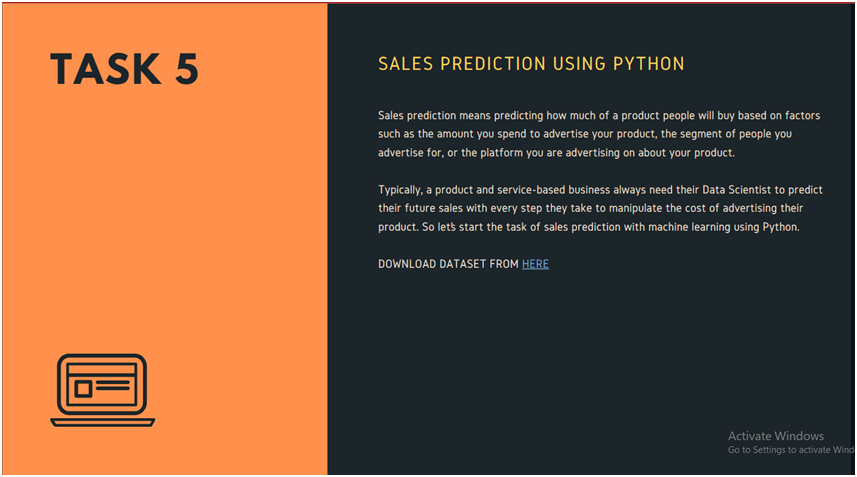

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd

In [19]:
# reading the csv file
df = pd.read_csv("/content/archive (5).zip")

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape


(200, 5)

In [ ]:
# checking for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
#removing the unnamed column as it is not needed
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
#plotting graph
import plotly.express as pl

pl.scatter(df,x='TV', y='Sales',width=600,height=500,title = 'sales vs TV')

In [ ]:
pl.scatter(df,x='Radio', y='Sales',width=600,height=500,title = 'sales vs Radio')



In [ ]:
pl.scatter(df,x='Newspaper', y='Sales',width=600,height=500,title = 'sales vs Newspaper')

In [ ]:

# dividing data into x and y variables

x = df.drop('Sales',axis = 1)
y = df['Sales']


In [ ]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.3, random_state = 3)

In [ ]:
# prediction using LInear regesssion model

from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [14]:
# fitting the data into model

model.fit(xtrain,ytrain)

LinearRegression()

In [15]:
# intercept and coefficient
print("Intercept: ",model.intercept_)
print("coefficient: ",list(zip(x,model.coef_)))

Intercept:  3.5238550353772666
coefficient:  [('TV', 0.04294216706294271), ('Radio', 0.18791469838166755), ('Newspaper', -0.0054131778558528035)]


In [16]:
#predictions
pred = model.predict(xtest)

In [17]:
dataframe = pd.DataFrame({"Intercept": ytest, "coeffcient" : pred})
dataframe.head()

,Intercept,coeffcient
40,16.6,16.239085
51,10.7,9.619742
139,20.7,19.704115
197,12.8,12.837581
170,8.4,7.751171


In [18]:
# accuracy
from sklearn.metrics import r2_score

print("r2 score :",r2_score(ytest, pred))

r2 score : 0.8760893953712908
